# Analysis of published papers

In [1]:
%run setup.py

In [28]:
df_Invited = pd.read_csv(os.path.join(filepath,'factInvited.csv'))
df_Proceedings = pd.read_csv(os.path.join(filepath,'factProceedings.csv'))

# This person is an outlier, so we remove him from the analysis
df_Invited = df_Invited[df_Invited['Full name'] != "Wei Wei"]
df_Proceedings.head()

,Full name,Year,Conference (short),First name,Middle name,Last name,gender,Paper Count,Max Paper Count,First year paper,Age,Conference (long),Main Topic
0,Isao Shirakawa,1995,ASPDAC,Isao,NaN,Shirakawa,M,26,93,1977,18,Asia and South Pacific Design Automation Confe...,Computer Architecture
1,Tingting Hwang,1995,ASPDAC,Tingting,NaN,Hwang,F,16,107,1989,6,Asia and South Pacific Design Automation Confe...,Computer Architecture
2,Sanjay Dhar,1995,ASPDAC,Sanjay,NaN,Dhar,M,4,5,1983,12,Asia and South Pacific Design Automation Confe...,Computer Architecture
3,Dave J. Gurney,1995,ASPDAC,Dave,J.,Gurney,M,1,1,1995,0,Asia and South Pacific Design Automation Confe...,Computer Architecture
4,Michel Thill,1995,ASPDAC,Michel,NaN,Thill,M,3,4,1994,1,Asia and South Pacific Design Automation Confe...,Computer Architecture


### Define function

In [3]:
def plot_hist(list1,list1_label, list2,list2_label,fig_title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    ax1.hist(list1, bins=20, alpha=0.7, label=list1_label,density=True)
    ax1.hist(list2, bins=20, alpha=0.7, label=list2_label,density=True)
    ax1.set_xlabel('Number of papers per speaker at the time of the conference')
    ax1.set_ylabel('Density')
    ax1.set_title('Historgram of number of papers per speaker')
    ax1.legend(loc='upper right')
    
    # Prepare data for log-log histogram
    bins = np.logspace(np.log10(min(list1)), np.log10(max(list1)), 20)
    hist,edges = np.histogram(list1, bins=bins, density=True)
    x = (edges[1:]+edges[:-1])/2.

    bins1 = np.logspace(np.log10(min(list2)), np.log10(max(list2)), 20)
    hist1,edges1 = np.histogram(list2, bins=bins, density=True)
    x1 = (edges1[1:]+edges1[:-1])/2.
    
    xx,yy = zip(*[(i,j) for (i,j) in zip(x,hist) if j>0])
    xx1,yy1 = zip(*[(i,j) for (i,j) in zip(x1,hist1) if j>0])

    ax2.plot(xx, yy, label=list1_label,marker='.')
    ax2.plot(xx1, yy1, label=list2_label,marker='.')
    ax2.set_xlabel('Number of papers per speaker at the time of the conference')
    ax2.set_ylabel('Probability Density')
    ax2.set_title('Number of papers per speaker')
    ax2.legend(loc='upper right')
    ax2.set_xscale('log')
    ax2.set_yscale('log')
        
    fig.suptitle(fig_title, fontsize=14)
    
    plt.show()

## Histogram between invited/proceedings

In [6]:
# Create lists
paper_per_pro = df_Proceedings['Paper Count'].values
paper_per_inv = df_Invited['Paper Count'].values

# drop all the rows with 0 paper count
paper_per_inv = paper_per_inv[paper_per_inv != 0]
paper_per_pro = paper_per_pro[paper_per_pro != 0]

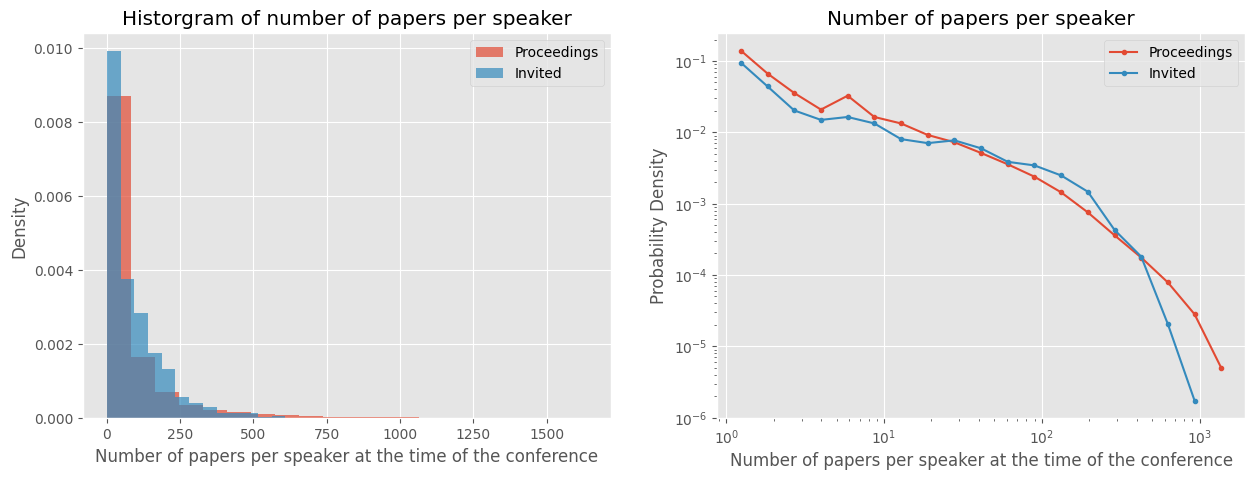

In [7]:
plot_hist(paper_per_pro,'Proceedings',paper_per_inv,'Invited','')

By setting the density to True, I compensate for the fact that there a many more proceedings than invited papers. 

## Histogram between females and males

In [8]:
# combine the values from Paper Count column from both the dataframes (df_Invited and df_Proceedings) where the gender column is "M" 
paper_per_male = list(df_Proceedings[df_Proceedings['gender'] == 'M']['Paper Count'].values) + list(df_Invited[df_Invited['gender'] == 'M']['Paper Count'].values)
paper_per_female = list(df_Proceedings[df_Proceedings['gender'] == 'F']['Paper Count'].values) + list(df_Invited[df_Invited['gender'] == 'F']['Paper Count'].values)

# drop all the rows with 0 paper count
paper_per_male = [x for x in paper_per_male if x != 0]
paper_per_female = [x for x in paper_per_female if x != 0]

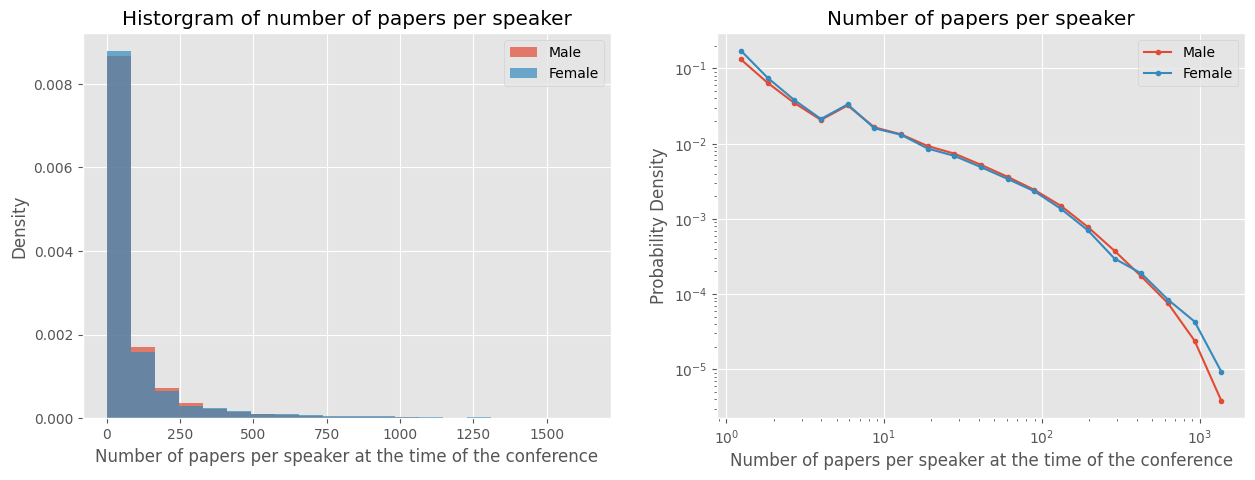

In [9]:
plot_hist(paper_per_male,'Male',paper_per_female,'Female','')

No difference, but is heavily impacted of proceedings

## Histogram between females and males for invited

In [10]:
# combine the values from Paper Count column from both the dataframes (df_Invited and df_Proceedings) where the gender column is "M" 
paper_per_male_inv = df_Invited[df_Invited['gender'] == 'M']['Paper Count'].values
paper_per_female_inv = df_Invited[df_Invited['gender'] == 'F']['Paper Count'].values

# drop all the rows with 0 paper count
paper_per_male_inv = paper_per_male_inv[paper_per_male_inv != 0]
paper_per_female_inv = paper_per_female_inv[paper_per_female_inv != 0]

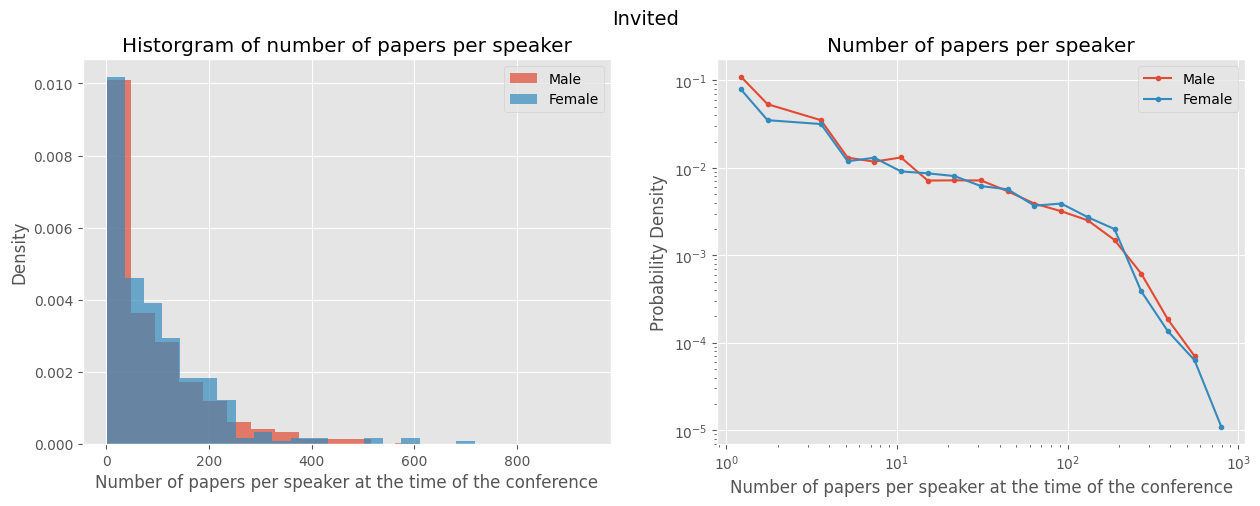

In [11]:
plot_hist(paper_per_male_inv,'Male',paper_per_female_inv,'Female','Invited')

## Histogram between females and males for proceedings

In [12]:
# combine the values from Paper Count column from both the dataframes (df_Invited and df_Proceedings) where the gender column is "M" 
paper_per_male_pro = df_Proceedings[df_Proceedings['gender'] == 'M']['Paper Count'].values
paper_per_female_pro = df_Proceedings[df_Proceedings['gender'] == 'F']['Paper Count'].values

# drop all the rows with 0 paper count
paper_per_male_pro = paper_per_male_pro[paper_per_male_pro != 0]
paper_per_female_pro = paper_per_female_pro[paper_per_female_pro != 0]

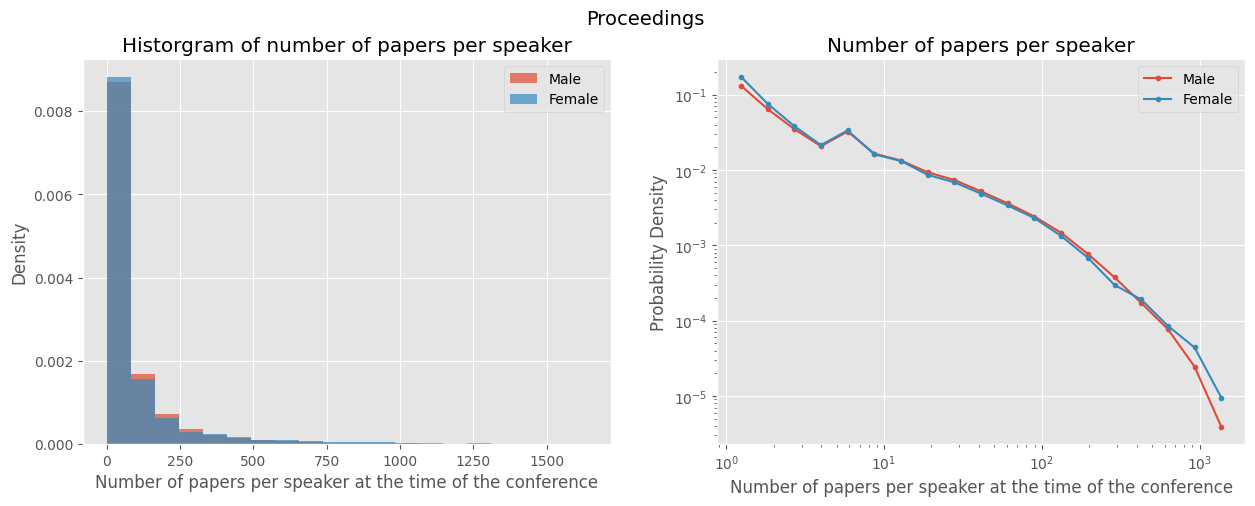

In [13]:
plot_hist(paper_per_male_pro,'Male',paper_per_female_pro,'Female','Proceedings')

## Histogram of fields

### Define function

In [16]:
def get_field_lists(df,field):
    df = df[df['Main Topic'] == field]
    list_M = df[df['gender'] == "M"]['Paper Count'].values
    list_F = df[df['gender'] == "F"]['Paper Count'].values
    
    list_M = list_M[list_M != 0]
    list_F = list_F[list_F != 0]
    return list_M,list_F

conference_list = list(df_Invited['Main Topic'].unique())

5.01 % of the data set is in this field: Computer Graphics


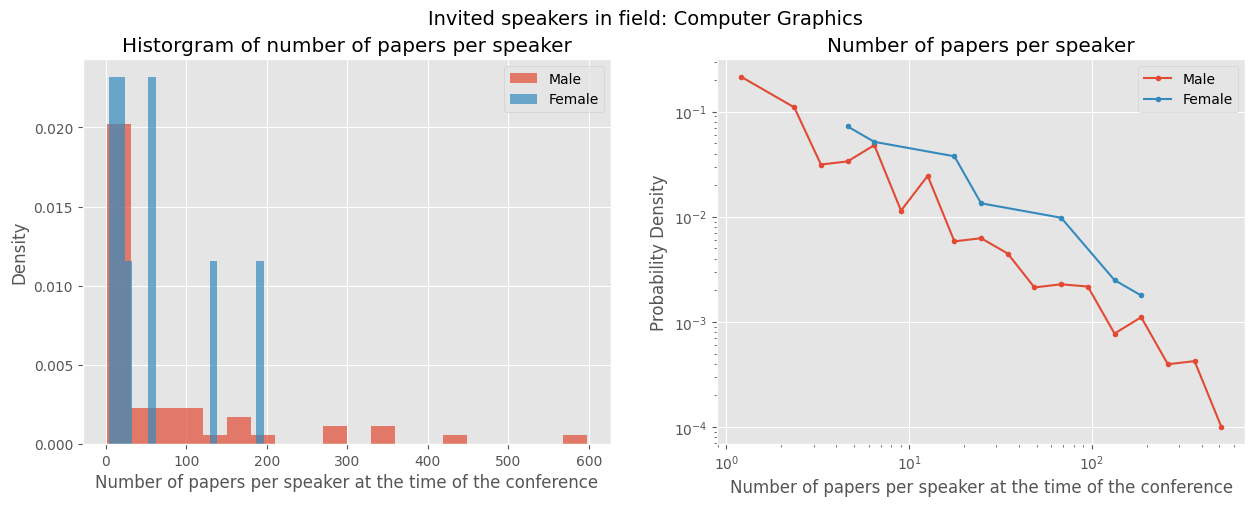

In [27]:
id = 7
print(round(df_Invited[df_Invited['Main Topic'] == conference_list[id]].shape[0]/df_Invited.shape[0]*100,2),'% of the data set is in this field:',conference_list[id])
paper_male_inv_field, paper_female_inv_field = get_field_lists(df_Invited, conference_list[id])
plot_hist(paper_male_inv_field,'Male',paper_female_inv_field,'Female','Invited speakers in field: ' + conference_list[id])

id 0 = no data <br>
id 1 = gaps <br>
id 2 = women are following along <br>
id 3 = not many women <br>
id 4 = not much data <br>
id 5 = gaps? <br>
id 6 = ? <br>
id 7 = there is a gap <br>